In [62]:
! pip install luminol

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.5/824.5 kB 8.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for future: filename=future-0.16.0-py3-none-any.whl size=487792 sha256=13f4b151b779e0399d256d7d1b12104b33b7d05f46b2c102cbbce865d3e2f26c
  Stored in directory: /root/.cache/pip/wheels/99/10/cf/94af142fb7fe16e7327b17dc4d6d69ed041f8ec74b1fef10b2
Successfully built future
  Attempting uninstall: future
    Found existing installation: future 1.0.0
    Uninstalling future-1.0.0:
      Successfully uninstalled future-1.0.0


In [78]:
import pandas as pd

# Load the dataset
file_path = '/content/calls_total_df.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


                  Time  Value                     exported_instance  \
0  2024-08-18 18:30:00    0.0  4e7184d9-e546-45dc-bed1-15904d41e452   
1  2024-08-18 19:00:00    0.0  4e7184d9-e546-45dc-bed1-15904d41e452   
2  2024-08-18 19:30:00    0.0  4e7184d9-e546-45dc-bed1-15904d41e452   
3  2024-08-18 20:00:00    0.0  4e7184d9-e546-45dc-bed1-15904d41e452   
4  2024-08-18 20:30:00    0.0  4e7184d9-e546-45dc-bed1-15904d41e452   

  exported_job http_method http_route  http_status_code             instance  \
0      express         GET          /             200.0  otel-collector:8889   
1      express         GET          /             200.0  otel-collector:8889   
2      express         GET          /             200.0  otel-collector:8889   
3      express         GET          /             200.0  otel-collector:8889   
4      express         GET          /             200.0  otel-collector:8889   

                        job service_name         span_kind span_name  \
0  aggregated-trace-

In [8]:
import numpy as np

# Temporary patch for numpy asscalar deprecation
def custom_asscalar(a):
    return a.item() if isinstance(a, np.generic) else a

# Overriding numpy.asscalar with the custom function
np.asscalar = custom_asscalar


            Start Time            End Time  Anomaly Score
0  2024-08-19 02:30:00 2024-08-19 02:30:00       3.330064
1  2024-08-19 10:00:00 2024-08-19 10:00:00       4.455109
2  2024-08-19 18:30:00 2024-08-19 18:30:00       3.572606
3  2024-08-20 02:30:00 2024-08-20 02:30:00       4.067226
4  2024-08-20 04:00:00 2024-08-20 04:30:00       3.544502
5  2024-08-20 14:00:00 2024-08-20 14:30:00       4.281925
6  2024-08-20 22:30:00 2024-08-20 22:30:00       3.324061
7  2024-08-21 07:00:00 2024-08-21 07:00:00       3.137300
8  2024-08-21 16:00:00 2024-08-21 16:00:00       3.954501
9  2024-08-21 18:30:00 2024-08-21 18:30:00       3.191567
10 2024-08-22 01:00:00 2024-08-22 01:00:00       3.307653
11 2024-08-22 12:00:00 2024-08-22 12:00:00       3.817839
12 2024-08-24 02:00:00 2024-08-24 02:00:00       4.357905
13 2024-08-25 02:00:00 2024-08-25 02:00:00       4.676955
14 2024-08-25 14:00:00 2024-08-25 15:00:00       3.500305
15 2024-08-26 10:30:00 2024-08-26 11:00:00       4.961504
16 2024-08-27 

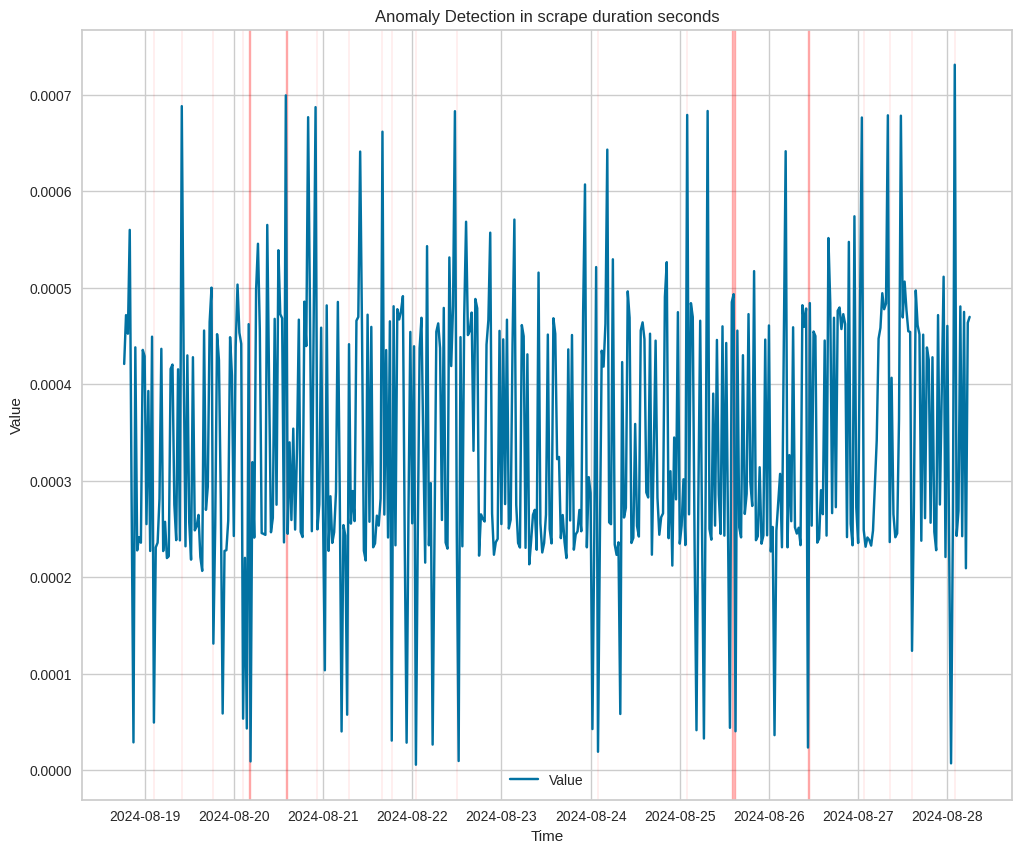

In [21]:
import pandas as pd
from luminol.anomaly_detector import AnomalyDetector
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/scrape_duration_seconds_df.csv')

# Preprocess the data: Convert 'Time' to datetime and set it as index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Convert the 'Time' index to Unix timestamp and the 'Value' column to a dictionary
# Ensure that the timestamps are converted to integers (Unix time in seconds)
time_series_data = {int(ts.timestamp()): value for ts, value in df['Value'].items()}

# Initialize the AnomalyDetector
detector = AnomalyDetector(time_series_data)

# Detect anomalies
anomalies = detector.get_anomalies()

# Check if any anomalies were detected
if not anomalies:
    print("No anomalies were detected.")
else:
    # Prepare a list of detected anomalies
    anomalies_list = [(pd.to_datetime(anomaly.start_timestamp, unit='s'),
                       pd.to_datetime(anomaly.end_timestamp, unit='s'),
                       anomaly.anomaly_score) for anomaly in anomalies]

    # Convert the anomalies list to a DataFrame for easier analysis
    anomalies_df = pd.DataFrame(anomalies_list, columns=['Start Time', 'End Time', 'Anomaly Score'])

    # Print the anomalies dataframe to check if anomalies were detected
    print(anomalies_df)

    # Plot the time series and the anomalies
    plt.figure(figsize=(12, 10))
    plt.plot(df.index, df['Value'], label='Value')

    # Highlight the anomalies on the plot and add text labels
    for start_time, end_time, score in anomalies_list:
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)
        # plt.text(start_time, df['Value'].min(), f'Score: {score:.2f}', color='red', fontsize=10,
        #          ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Anomaly Detection in scrape duration seconds')
    plt.legend()
    plt.show()


            Start Time            End Time  Anomaly Score
0  2024-08-19 02:30:00 2024-08-19 02:30:00       3.330064
1  2024-08-19 10:00:00 2024-08-19 10:00:00       4.455109
2  2024-08-19 18:30:00 2024-08-19 18:30:00       3.572606
3  2024-08-20 02:30:00 2024-08-20 02:30:00       4.067226
4  2024-08-20 04:00:00 2024-08-20 04:30:00       3.544502
5  2024-08-20 14:00:00 2024-08-20 14:30:00       4.281925
6  2024-08-20 22:30:00 2024-08-20 22:30:00       3.324061
7  2024-08-21 07:00:00 2024-08-21 07:00:00       3.137300
8  2024-08-21 16:00:00 2024-08-21 16:00:00       3.954501
9  2024-08-21 18:30:00 2024-08-21 18:30:00       3.191567
10 2024-08-22 01:00:00 2024-08-22 01:00:00       3.307653
11 2024-08-22 12:00:00 2024-08-22 12:00:00       3.817839
12 2024-08-24 02:00:00 2024-08-24 02:00:00       4.357905
13 2024-08-25 02:00:00 2024-08-25 02:00:00       4.676955
14 2024-08-25 14:00:00 2024-08-25 15:00:00       3.500305
15 2024-08-26 10:30:00 2024-08-26 11:00:00       4.961504
16 2024-08-27 

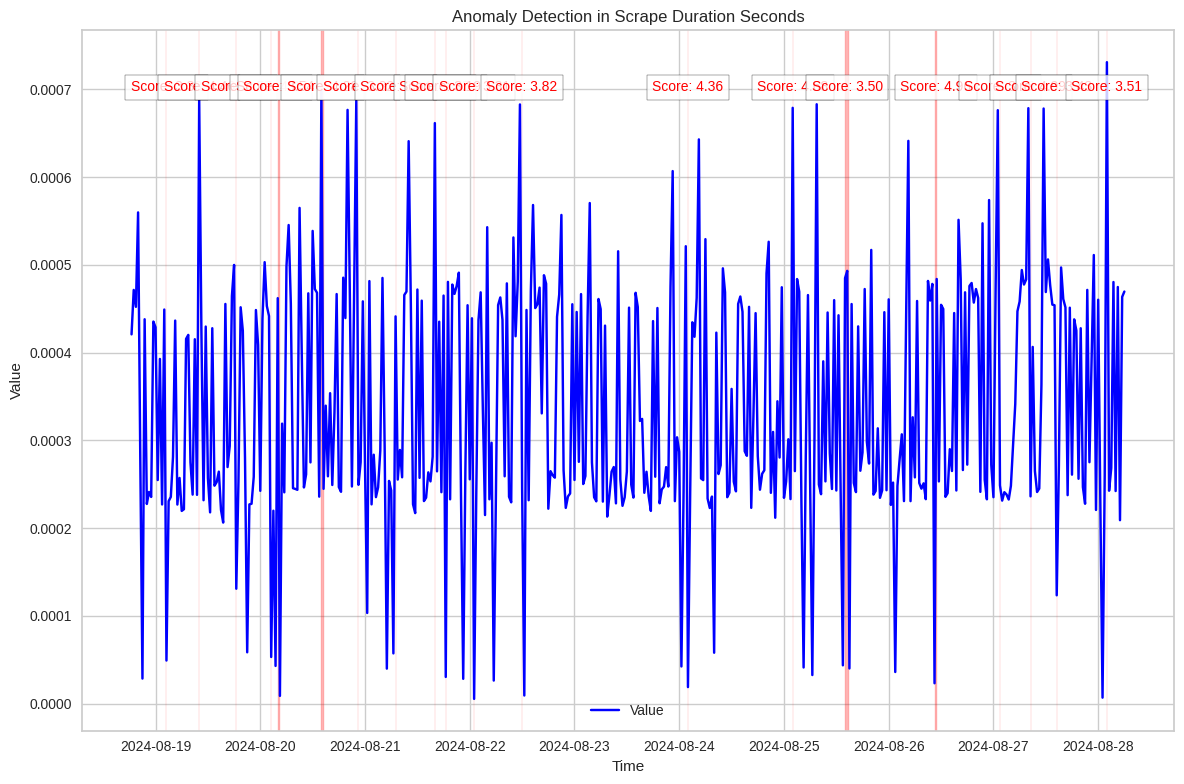

In [23]:
#For Scrap Duration Seconds
import pandas as pd
from luminol.anomaly_detector import AnomalyDetector
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/scrape_duration_seconds_df.csv')

# Preprocess the data: Convert 'Time' to datetime and set it as index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Convert the 'Time' index to Unix timestamp and the 'Value' column to a dictionary
time_series_data = {int(ts.timestamp()): value for ts, value in df['Value'].items()}

# Initialize the AnomalyDetector
detector = AnomalyDetector(time_series_data)

# Detect anomalies
anomalies = detector.get_anomalies()

# Check if any anomalies were detected
if not anomalies:
    print("No anomalies were detected.")
else:
    # Prepare a list of detected anomalies
    anomalies_list = [(pd.to_datetime(anomaly.start_timestamp, unit='s'),
                       pd.to_datetime(anomaly.end_timestamp, unit='s'),
                       anomaly.anomaly_score) for anomaly in anomalies]

    # Convert the anomalies list to a DataFrame for easier analysis
    anomalies_df = pd.DataFrame(anomalies_list, columns=['Start Time', 'End Time', 'Anomaly Score'])

    # Print the anomalies dataframe to check if anomalies were detected
    print(anomalies_df)

    # Plot the time series and the anomalies
    plt.figure(figsize=(12, 8))
    plt.plot(df.index, df['Value'], label='Value', color='blue')

    # Highlight the anomalies on the plot and add text labels
    for start_time, end_time, score in anomalies_list:
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)
        # Place text annotations
        mid_time = start_time + (end_time - start_time) / 2
        plt.text(mid_time, df['Value'].max() * 0.95, f'Score: {score:.2f}', color='red', fontsize=10,
                 ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.8))

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Anomaly Detection in Scrape Duration Seconds')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Empty DataFrame
Columns: [Start Time, End Time, Anomaly Score]
Index: []


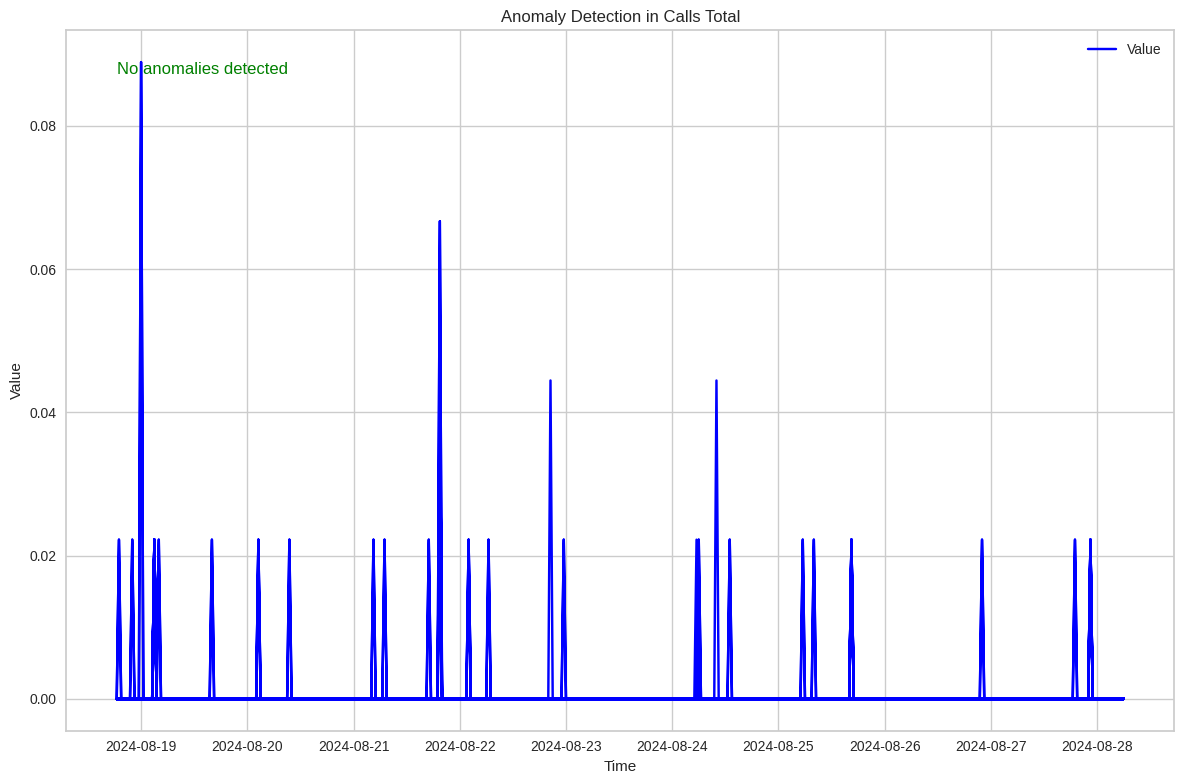

In [29]:
#Calls Total
import pandas as pd
from luminol.anomaly_detector import AnomalyDetector
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/calls_total_df.csv')

# Preprocess the data: Convert 'Time' to datetime and set it as index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Convert the 'Time' index to Unix timestamp and the 'Value' column to a dictionary
time_series_data = {int(ts.timestamp()): value for ts, value in df['Value'].items()}

# Initialize the AnomalyDetector
detector = AnomalyDetector(time_series_data)

# Detect anomalies
anomalies = detector.get_anomalies()

# Prepare a list of detected anomalies
anomalies_list = [(pd.to_datetime(anomaly.start_timestamp, unit='s'),
                   pd.to_datetime(anomaly.end_timestamp, unit='s'),
                   anomaly.anomaly_score) for anomaly in anomalies]

# Convert the anomalies list to a DataFrame for easier analysis
anomalies_df = pd.DataFrame(anomalies_list, columns=['Start Time', 'End Time', 'Anomaly Score'])

# Print the anomalies dataframe to check if anomalies were detected
print(anomalies_df)

# Plot the time series
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Value'], label='Value', color='blue')

# Check if anomalies were detected and plot them
if anomalies_list:
    for start_time, end_time, score in anomalies_list:
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)
        # Place text annotations
        mid_time = start_time + (end_time - start_time) / 2
        plt.text(mid_time, df['Value'].max() * 0.95, f'Score: {score:.2f}', color='red', fontsize=10,
                 ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.8))
else:
    # Display a message if no anomalies were detected
    plt.text(df.index[0], df['Value'].max(), 'No anomalies detected', color='green', fontsize=12,
             ha='left', va='top')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomaly Detection in Calls Total')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Empty DataFrame
Columns: [Start Time, End Time, Anomaly Score]
Index: []


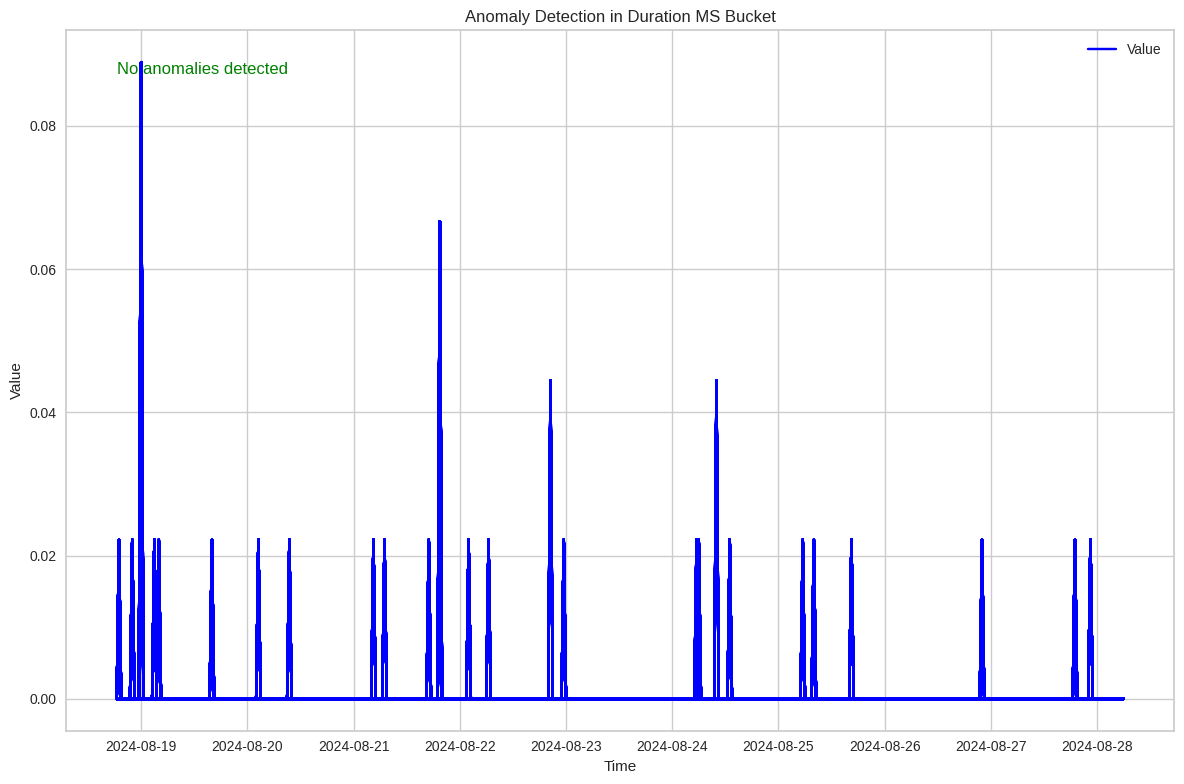

In [30]:
import pandas as pd
from luminol.anomaly_detector import AnomalyDetector
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/duration_ms_bucket_df.csv')

# Preprocess the data: Convert 'Time' to datetime and set it as index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Convert the 'Time' index to Unix timestamp and the 'Value' column to a dictionary
time_series_data = {int(ts.timestamp()): value for ts, value in df['Value'].items()}

# Initialize the AnomalyDetector
detector = AnomalyDetector(time_series_data)

# Detect anomalies
anomalies = detector.get_anomalies()

# Prepare a list of detected anomalies
anomalies_list = [(pd.to_datetime(anomaly.start_timestamp, unit='s'),
                   pd.to_datetime(anomaly.end_timestamp, unit='s'),
                   anomaly.anomaly_score) for anomaly in anomalies]

# Convert the anomalies list to a DataFrame for easier analysis
anomalies_df = pd.DataFrame(anomalies_list, columns=['Start Time', 'End Time', 'Anomaly Score'])

# Print the anomalies dataframe
print(anomalies_df)

# Plot the time series
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Value'], label='Value', color='blue')

# Check if anomalies were detected and plot them
if anomalies_list:
    for start_time, end_time, score in anomalies_list:
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)
        # Place text annotations
        mid_time = start_time + (end_time - start_time) / 2
        plt.text(mid_time, df['Value'].max() * 0.95, f'Score: {score:.2f}', color='red', fontsize=10,
                 ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.8))
else:
    # Display a message if no anomalies were detected
    plt.text(df.index[0], df['Value'].max(), 'No anomalies detected', color='green', fontsize=12,
             ha='left', va='top')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomaly Detection in Duration MS Bucket')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Empty DataFrame
Columns: [Start Time, End Time, Anomaly Score]
Index: []


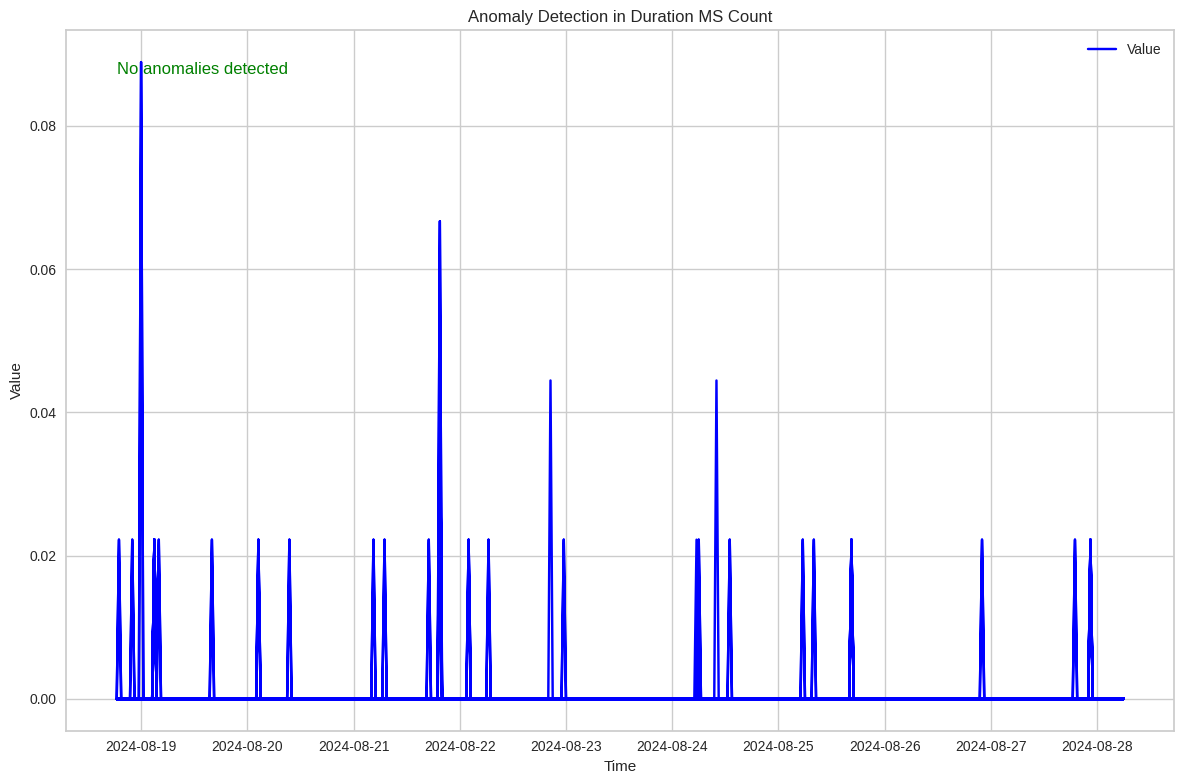

In [32]:
#Duration MS Count
import pandas as pd
from luminol.anomaly_detector import AnomalyDetector
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/duration_ms_count_df.csv')

# Preprocess the data: Convert 'Time' to datetime and set it as index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Convert the 'Time' index to Unix timestamp and the 'Value' column to a dictionary
time_series_data = {int(ts.timestamp()): value for ts, value in df['Value'].items()}

# Initialize the AnomalyDetector
detector = AnomalyDetector(time_series_data)

# Detect anomalies
anomalies = detector.get_anomalies()

# Prepare a list of detected anomalies
anomalies_list = [(pd.to_datetime(anomaly.start_timestamp, unit='s'),
                   pd.to_datetime(anomaly.end_timestamp, unit='s'),
                   anomaly.anomaly_score) for anomaly in anomalies]

# Convert the anomalies list to a DataFrame for easier analysis
anomalies_df = pd.DataFrame(anomalies_list, columns=['Start Time', 'End Time', 'Anomaly Score'])

# Print the anomalies dataframe
print(anomalies_df)

# Plot the time series
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Value'], label='Value', color='blue')

# Check if anomalies were detected and plot them
if anomalies_list:
    for start_time, end_time, score in anomalies_list:
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)
        # Place text annotations
        mid_time = start_time + (end_time - start_time) / 2
        plt.text(mid_time, df['Value'].max() * 0.95, f'Score: {score:.2f}', color='red', fontsize=10,
                 ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.8))
else:
    # Display a message if no anomalies were detected
    plt.text(df.index[0], df['Value'].max(), 'No anomalies detected', color='green', fontsize=12,
             ha='left', va='top')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomaly Detection in Duration MS Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Empty DataFrame
Columns: [Start Time, End Time, Anomaly Score]
Index: []


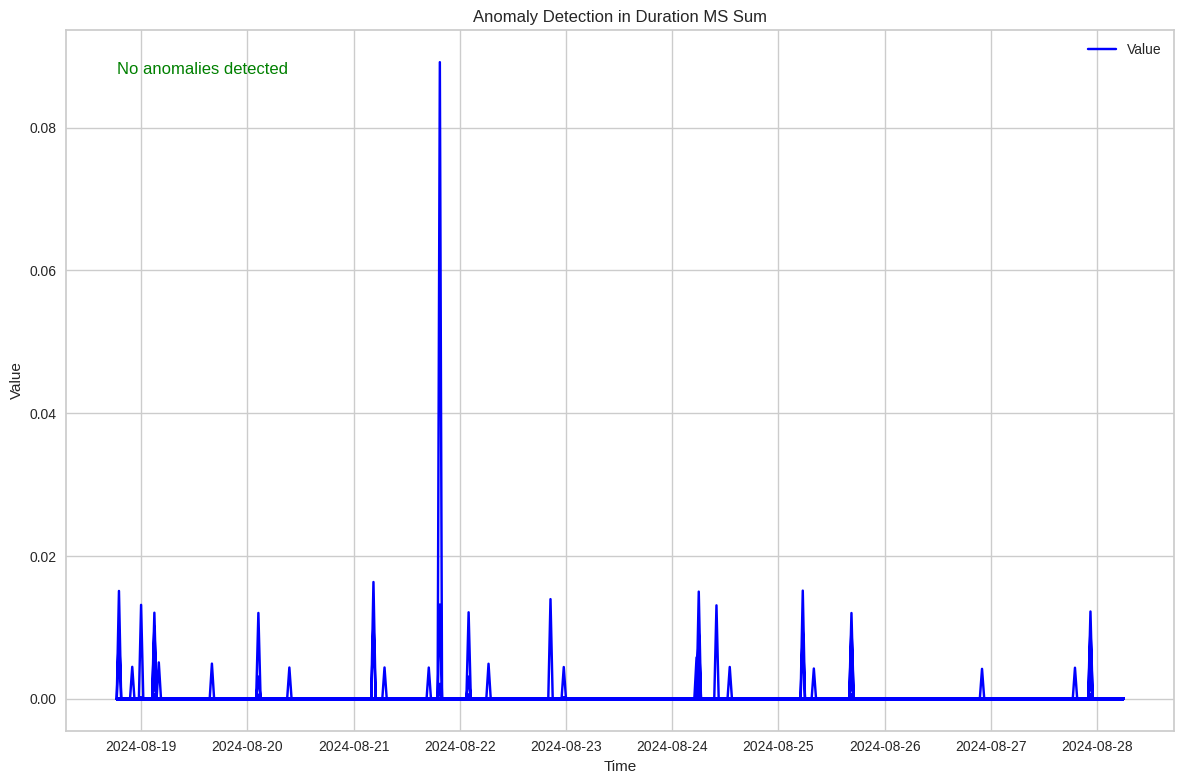

In [31]:
#Duration MS Sum
import pandas as pd
from luminol.anomaly_detector import AnomalyDetector
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/duration_ms_sum_df.csv')

# Preprocess the data: Convert 'Time' to datetime and set it as index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Convert the 'Time' index to Unix timestamp and the 'Value' column to a dictionary
time_series_data = {int(ts.timestamp()): value for ts, value in df['Value'].items()}

# Initialize the AnomalyDetector
detector = AnomalyDetector(time_series_data)

# Detect anomalies
anomalies = detector.get_anomalies()

# Prepare a list of detected anomalies
anomalies_list = [(pd.to_datetime(anomaly.start_timestamp, unit='s'),
                   pd.to_datetime(anomaly.end_timestamp, unit='s'),
                   anomaly.anomaly_score) for anomaly in anomalies]

# Convert the anomalies list to a DataFrame for easier analysis
anomalies_df = pd.DataFrame(anomalies_list, columns=['Start Time', 'End Time', 'Anomaly Score'])

# Print the anomalies dataframe
print(anomalies_df)

# Plot the time series
plt.figure(figsize=(12, 8))
plt.plot(df.index, df['Value'], label='Value', color='blue')

# Check if anomalies were detected and plot them
if anomalies_list:
    for start_time, end_time, score in anomalies_list:
        plt.axvspan(start_time, end_time, color='red', alpha=0.3)
        # Place text annotations
        mid_time = start_time + (end_time - start_time) / 2
        plt.text(mid_time, df['Value'].max() * 0.95, f'Score: {score:.2f}', color='red', fontsize=10,
                 ha='center', va='bottom', bbox=dict(facecolor='white', alpha=0.8))
else:
    # Display a message if no anomalies were detected
    plt.text(df.index[0], df['Value'].max(), 'No anomalies detected', color='green', fontsize=12,
             ha='left', va='top')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomaly Detection in Duration MS Sum')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
